## Universidade Federal de Viçosa

### Estrutura de Dados e Algoritmos
### Aluno: Erick Lima Figueiredo | MA: 98898


###1 - Projeto de Algoritmo

Pseudocódigo:

```
should_almost_sort(items, len) -> items:
  cursor <- 0

  // Coloca positivos à direita
  for i in 0 to len - 1:
    if items[i] < 0:
      swap(items[i], items[cursor])
      cursor <- cursor + 1
  
  // Coloca positivos estritamente maiores que zero à direita
  for i in cursor to len - 1:
    if items[i] == 0:
      swap(items[i], items[cursor])
      cursor <- cursor + 1
```

In [ ]:
def should_almost_sort_old(items: list) -> list:
  first_pos_idx = -1
  first_zero_idx = -1

  for i in range(len(items)):
    if items[i] >= 0 and first_pos_idx == -1:
      first_pos_idx = i

    elif items[i] < 0 and first_pos_idx != -1:
      items[i], items[first_pos_idx] = items[first_pos_idx], items[i]
      first_pos_idx += 1


  for i in range(first_pos_idx, len(items)):
    if not items[i] and first_zero_idx == -1:
      items[i], items[first_pos_idx] =  items[first_pos_idx], items[i]
      first_zero_idx = first_pos_idx

    elif not items[i]:
      first_zero_idx += 1
      items[i], items[first_zero_idx] =  items[first_zero_idx], items[i]

  return items

In [ ]:
def should_almost_sort(items: list) -> tuple[list, int, int]:
  cursor = 0
  comp = len(items)

  for i in range(len(items)):
    if items[i] < 0:
      items[i], items[cursor] = items[cursor], items[i]
      cursor += 1

  comp += len(items) - cursor
  for i in range(cursor, len(items)):
    if not items[i]:
      items[i], items[cursor] = items[cursor], items[i]
      cursor += 1

  return items, cursor, comp

In [ ]:
import random

def gen_random_numbers(n):
  return [random.randint(-100, 100) for _ in range(n)]

In [ ]:
x = []
y = []
y1 = []

for i in [10, 50, 100, 500, 1_000, 5_000, 10_000]:
  x.append(i)
  v, swaps, comps = should_almost_sort(gen_random_numbers(i))
  print(v)
  y.append(swaps)
  y1.append(comps)


[-19, -27, -94, 9, 44, 94, 39, 37, 63, 22]
[-59, -47, -67, -79, -67, -88, -85, -52, -42, -86, -69, -96, -26, -20, -54, -46, -99, -79, -54, -10, -58, -77, -5, -2, -14, -1, -4, -43, -79, -81, 43, 66, 39, 27, 25, 38, 28, 22, 82, 13, 38, 71, 31, 68, 41, 98, 60, 14, 82, 17]
[-100, -9, -39, -85, -75, -71, -81, -63, -92, -34, -62, -38, -54, -59, -11, -55, -35, -23, -5, -87, -50, -60, -20, -50, -15, -87, -89, -3, -58, -85, -84, -47, -59, -32, -92, -11, -9, -9, -41, -30, -95, -84, -33, -45, -99, -69, -20, -91, -25, -96, -97, -77, -45, 46, 58, 17, 31, 98, 41, 56, 16, 16, 52, 80, 5, 62, 63, 53, 43, 58, 27, 20, 32, 3, 61, 7, 96, 56, 10, 36, 46, 87, 4, 49, 41, 45, 63, 52, 36, 22, 57, 62, 82, 3, 10, 15, 85, 54, 15, 67]
[-59, -39, -63, -52, -25, -83, -74, -95, -58, -5, -26, -44, -86, -54, -86, -88, -7, -29, -72, -88, -19, -35, -43, -19, -40, -48, -61, -88, -65, -86, -13, -57, -49, -13, -6, -51, -24, -13, -15, -69, -10, -37, -41, -67, -51, -91, -100, -56, -96, -83, -40, -4, -81, -54, -58, -3, -3, -43,

In [ ]:
import matplotlib.pyplot as plt

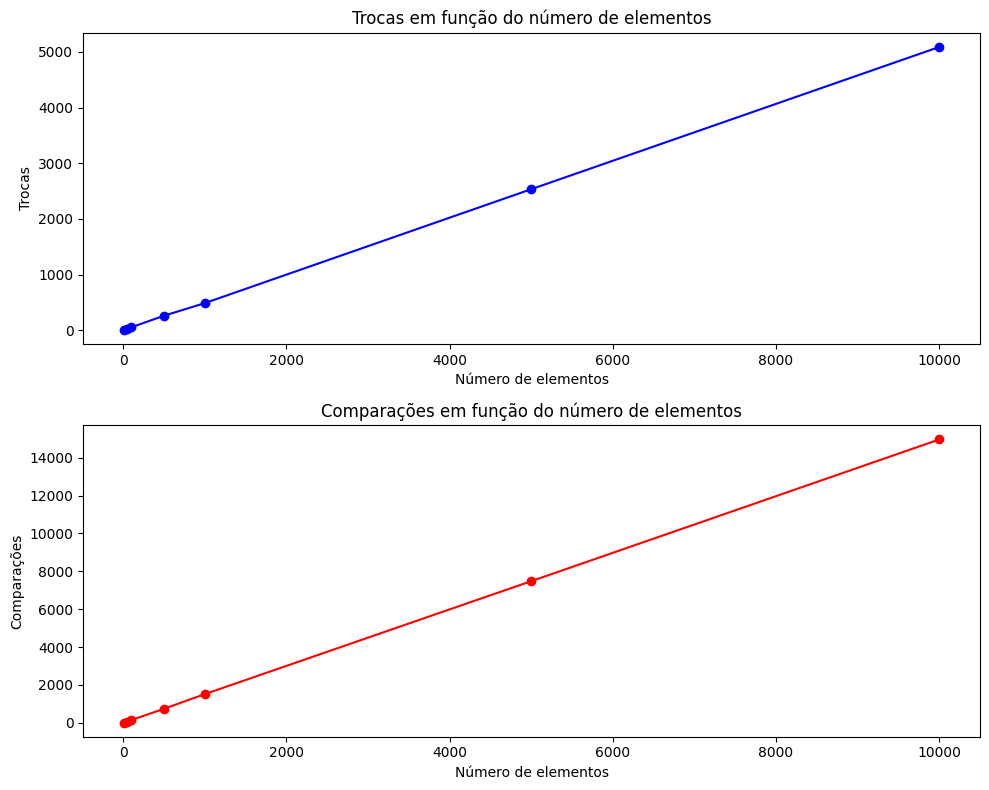

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(x, y, marker='o', color='b')
plt.title('Trocas em função do número de elementos')
plt.xlabel('Número de elementos')
plt.ylabel('Trocas')

plt.subplot(2, 1, 2)
plt.plot(x, y1, marker='o', color='r')
plt.title('Comparações em função do número de elementos')
plt.xlabel('Número de elementos')
plt.ylabel('Comparações')

plt.tight_layout()
plt.show()

###2 - Análise de Complexidade Recursiva

Fonte: https://colab.research.google.com/drive/1wsPP4FQmEd3-3EBQfKIsitF1QOG4PNYL#scrollTo=Ng6JCju_Lz5N

a) Pseudo-código

```
find_min_idx(list, begin, len):
  if len == 1 then
    return 0
  
  min_idx = find_min_idx(list, begin+1, len) + 1

  if list[0] <= list[min_idx] then
    return 0

  return min_idx

mistery(list, begin, len):
  if len == 1 then
    return

  min_idx = find_min_idx(list, begin, len)

  swap(list[0], list[min_idx])

  mistery(list, begin+1, len)
```

O Algoritmo faz uma ordenação em uma lista de n elementos aos moldes do `Selection Sort`, cuja complexidade é O(n²).

A operação básica de `mistery` é a busca do índice menor elemento da lista. Já a operação básica de `find_min_idx` é a comparação em busca do menor elemento.

---

b) Relação recorrente de `find_min_idx`:

```
F(n) = F(n-1) + 1, para n > 1
       1, para n = 1

F(n-1) + 1
F(n-2) + 1 + 1
F(n-3) + 1 + 1 + 1
...

Generalizando temos: F(n-k) + k

n-k = 1 -> k = n-1, substituindo na generalização, temos:
F(n-(n-1)) + n-1
F(1) + n - 1
1 + n - 1
n

F(n) percente à O(n)
```

Relação recorrente de `mistery`:

```
M(n) = F(n) + M(n-1), para n > 1
       0, para n = 1

Essa é uma recorrência notável no formato:
T(n) = T(n-1) + cn
T(1) = d

Cuja solução é dada por: T(n) = c (n(n+1)/2 -1) + d => T(n) percente O(n²)

Portanto M(n) percente à O(n²)
```

       

